# Les arbres de décision

Les arbres de décision sont des outils d’aide à la prise de décision et d’exploitation de données permettant de présenter un ensemble de données sous la forme graphique d’un arbre.

Cette méthode d’apprentissage automatique est de type supervisé permettant de résoudre à la fois des problèmes de classification et de régression.

Un arbre de décision est composé de :

* Un nœud racine par lequel les données entrent.
* Des nœuds de décision représentant un classement de questions et de réponses qui conditionnent la question suivante.
* Des branches qui connectent entre les nœuds et pouvant être orientées. Dans ce cas l’un des nœuds de la connexion est appelé nœud parent et l’autre nœud enfant.

Remarque :

* Les nœuds peuvent être connectés à un seul nœud parent, saut pour le nœud racine qui n’en a aucun.
* Un nœud qui n’a aucun nœud enfant est appelé nœud feuille ou simplement feuille.

Un chemin cependant est le parcours à partir du nœud racine jusqu’à un nœud feuille.

Pour un arbre de décision chaque nœud correspond à une variable prédictive, ainsi chaque nœud feuille représente la variable cible et chaque branche correspond à une valeur pour la variable prédictive du nœud parent.

L’objectif des arbres de décision est de créer un modèle qui permet la prédiction de la valeur de la variable cible en apprenant des règles de décisions simples conclues des caractéristiques des données.

Alors le nœud racine est le nœud d’entrée et les nœuds feuilles représentent la sortie finale.

# Module Scikit_learn

### Classification avec les arbres de décision

* Les arbres de classification permettent de prédire l’étiquette de la classe à laquelle une variable cible appartient. Pour cela les variables doivent être catégoriques.
* La bibliothèque scikit-learn fournit le module DecisionTreeClassifier qui effectue sur un ensemble de données une classification multi-classe.
* Afin de démontrer le fonctionnement de ce module, nous allons l’appliquer sur la dataset « iris » qui concerne les trois espèces de l’iris représentées comme suivant : 0 pour setosa, 1 pour versicolor et 2 pour virginica.
* Nous allons importer le module pandas qui nous permettra de lire le fichier csv, on importe aussi train_test_split qui nous permettra de fractionner la dataset en données de training et de test.
* Ensuite on charge le fichier CSV comprenant les données et on définit une variable x qui va contenir les données de caractéristique et une autre variable y pour les valeurs cibles qui sont les étiquettes de classe pour les échantillons d’entrainement.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('iris.csv')
a = df.loc[:, "petal_length"]
b = df.loc[:, "petal_width"]
x = list(zip(a, b))
y = df.loc[:, "class"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
x

[(1.4, 0.2),
 (1.4, 0.2),
 (1.3, 0.2),
 (1.5, 0.2),
 (1.4, 0.2),
 (1.7, 0.4),
 (1.4, 0.3),
 (1.5, 0.2),
 (1.4, 0.2),
 (1.5, 0.1),
 (1.5, 0.2),
 (1.6, 0.2),
 (1.4, 0.1),
 (1.1, 0.1),
 (1.2, 0.2),
 (1.5, 0.4),
 (1.3, 0.4),
 (1.4, 0.3),
 (1.7, 0.3),
 (1.5, 0.3),
 (1.7, 0.2),
 (1.5, 0.4),
 (1.0, 0.2),
 (1.7, 0.5),
 (1.9, 0.2),
 (1.6, 0.2),
 (1.6, 0.4),
 (1.5, 0.2),
 (1.4, 0.2),
 (1.6, 0.2),
 (1.6, 0.2),
 (1.5, 0.4),
 (1.5, 0.1),
 (1.4, 0.2),
 (1.5, 0.1),
 (1.2, 0.2),
 (1.3, 0.2),
 (1.5, 0.1),
 (1.3, 0.2),
 (1.5, 0.2),
 (1.3, 0.3),
 (1.3, 0.3),
 (1.3, 0.2),
 (1.6, 0.6),
 (1.9, 0.4),
 (1.4, 0.3),
 (1.6, 0.2),
 (1.4, 0.2),
 (1.5, 0.2),
 (1.4, 0.2),
 (4.7, 1.4),
 (4.5, 1.5),
 (4.9, 1.5),
 (4.0, 1.3),
 (4.6, 1.5),
 (4.5, 1.3),
 (4.7, 1.6),
 (3.3, 1.0),
 (4.6, 1.3),
 (3.9, 1.4),
 (3.5, 1.0),
 (4.2, 1.5),
 (4.0, 1.0),
 (4.7, 1.4),
 (3.6, 1.3),
 (4.4, 1.4),
 (4.5, 1.5),
 (4.1, 1.0),
 (4.5, 1.5),
 (3.9, 1.1),
 (4.8, 1.8),
 (4.0, 1.3),
 (4.9, 1.5),
 (4.7, 1.2),
 (4.3, 1.3),
 (4.4, 1.4),
 (4.8, 1.4),

In [7]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

* Dans le code suivant, on a tout d’abord importé la classe DecisionTreeClassifier puis on a fractionné notre dataset à l’aide de train_test_split qu’on a précédemment importé.

* Puis nous avons créé une instance model_DT de l’objet DecisionTreeClassifier. On entraine celle-ci à l’aide de la méthode fit() qu’on lui passe en paramètres x_train et y_train.

* En faisant appel à la méthode score() on calcule la précision de ce modèle.

* Puis finalement, on fait entrer la longueur et la largeur d’un iris et on demande au modèle DecisionTreeClassifier de prédire son espèce en utilisant la méthode de predict().

In [55]:
from sklearn.tree import DecisionTreeClassifier

#fractionner dataset (train-test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

#instanciation
model_DT = DecisionTreeClassifier()

#training
model_DT.fit(x_train, y_train)

#Prédiction
longueur = 1
largeur = 1
prediction = model_DT.predict( [[longueur, largeur]])

#calcule de précision
print( model_DT.score( x_test, y_test))

#affichage des résultats
resultat = "Résultat : "
if prediction[0] == 'Iris-setosa':
    resultat = resultat + "setosa"
if prediction[0] == 'Iris-versicolor':
    resultat = resultat + "versicolor"
if prediction[0] == 'Iris-virginica':
    resultat = resultat + "virginica"
print( resultat)


0.9333333333333333
Résultat : setosa


Le module DecisionTreeClassifier peut prendre plusieurs paramètres optionnels, nous ne présenterons ci-après que trois, jugées intéressantes :
- max_depth : Ce paramètre détermine la profondeur maximale de l’arbre. Il prend par défaut la valeur None qui revient à dire que les nœuds vont se développer jusqu’à ce que toutes les feuilles soient pures.
- min_samples_leaf : Ce paramètre donne le nombre minimum d’échantillons requis pour se retrouver à un nœud de feuille. Sa valeur par défaut est 1.
- criterion : Représente la fonction de mesure de la qualité d’une scission. Il peut prendre soit le critère « gini » qui correspond à l’impureté de Gini, soit « entropy » qui correspond au gain d’informations. Sa valeur par défaut est « gini ».

In [57]:
# On reprend la dataset « iris » et on lui applique le modèle DecisionTreeClassifier en lui 
# passant en paramètre max_depth et min_samples_leaf.

#instanciation
model_DT = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2 )
#training
model_DT.fit(x_train, y_train)
#Prédiction
longueur = 2.5
largeur = 0.75
prediction = model_DT.predict( [[longueur, largeur]])
#calcule de précision
print( model_DT.score( x_test, y_test))
#affichage des résultats
resultat = "Résultat : "
if prediction[0] == 'Iris-setosa':
    resultat = resultat + "setosa"
if prediction[0] == 'Iris-versicolor':
    resultat = resultat + "versicolor"
if prediction[0] == 'Iris-virginica':
    resultat = resultat + "virginica"
print( resultat)


0.9333333333333333
Résultat : versicolor


On peut aussi prévoir la probabilité de chaque classe en faisant appel à la méthode predict_proba().

In [59]:
prediction = model_DT.predict_proba([[2.5,0.75]])
print(prediction)

[[0.         0.97435897 0.02564103]]


### Régression avec les arbres de décision

Les arbres de régression permettent de prédire une valeur numérique qui est une quantité réelle. Pour cela les variables de décision sont continues.

La bibliothèque d’apprentissage automatique scikit-learn fournit le module DecisionTreeRegressor afin de performer l’algorithme d’arbre de décision sur des problèmes de régression.

Afin de démontrer le fonctionnement de ce module, nous allons générer un jeu de données aléatoire sur lequel notre algorithme de régression performera.

Dans la partie de code ci-dessous, on a importé dans un premier temps les modules nécessaires, à savoir numpy, matplotlib et la classe DecisionTreeRegressor. Nous avons ensuite rempli un tableau de nombres générées aléatoirement à l’aide de RandomState(). Puis à l’aide de la fonction ravel(), nous retournons un tableau contigu aplati.

Ensuite nous avons créé une instance model_DTReg de l’objet DecisionTreeRegressor. On entraine celle-ci à l’aide de la méthode fit() qu’on lui passe en paramètre x et y.

Finalement, on fait entrer une valeur de test x_test on demande au modèle DecisionTreeRegressor de faire sa prédiction en utilisant la méthode de predict().

On affiche par la suite un graphe représentant les données caractéristiques et les données cibles qu’on a précédemment générées (en rouge) et la prédiction (en bleu).

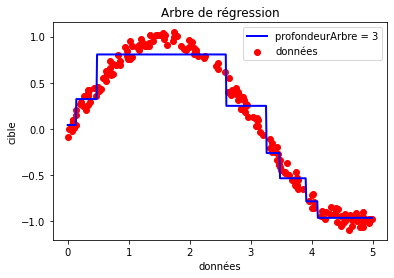

In [60]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
#générer les nombre aléatoire
generateur = np.random.RandomState(1)
#tableau trié contenant 80 nombre généré aléatoirement
x = np.sort(5 * generateur.rand(200, 1), axis = 0)
#applatir le tableau en utilisant ravel
y = np.sin(x).ravel()
#ajout d'un bruit
y[::1] += 0.2 * (0.5 - generateur.rand(200))
#instanciation
model_DTReg = DecisionTreeRegressor(max_depth = 3)
#training
model_DTReg.fit(x, y)
#prédiction
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# transformation d’un tableau 1D en un tableau N*1
prediction = model_DTReg.predict(x_test)
#affichage des résultats
plt.figure()
plt.scatter(x, y, c = "red", label = "données")
plt.plot(x_test, prediction, color = "blue", label = "profondeurArbre = 3",
linewidth = 2)
plt.xlabel("données")
plt.ylabel("cible")
plt.title("Arbre de régression")
plt.legend()
plt.show()

Le DecisionTreeRegressor prend plusieurs paramètres optionnels qui sont similaires à ceux du DecisionTreeClassifier. Certes, il diffère au niveau du paramètre criterion.

Pour le DecisionTreeRegressor, le paramètre criterion peut prendre l’une des valeurs suivantes :

- mse : Correspond à l’erreur quadratique moyenne. Elle est égale à la réduction de la variance comme critère de sélection des caractéristiques.

- freidman_mse : Correspond aussi à l’erreur quadratique moyenne mais avec le score d’amélioration de Friedman.

- mae : Correspond à l’erreur moyenne absolue. Minimise la perte de L1 en utilisant la médiane de chaque nœud terminal.

# Cas d’utilisation

Voici quelques utilisations des arbres de décision :
- La prévision des résultats dans le domaine de la finance et l’attribution de probabilité à ces résultats.

- La prévision binomiale sur les prix et l’analyse des options réelles.

- La volonté d’un client à acheter un produit donné dans un certain contexte.

- La planification des produits.

- Prise de décision générale pour les affaires.

- Approbation de prêt.

# Avantages et limites

### Avantages

Ce qui rend les arbres de décision intéressants est leur simplicité à comprendre et à visualiser, leur faible nécessité de préparation de données et le fait que leur coût d’utilisation est logarithmique. Ils peuvent également utiliser des données catégorielles ainsi que numériques.

### Limites

Les modèles d’arbre de décision peuvent quelque fois montrer du sur-apprentissage, c’est-à-dire que dans certains cas d’utilisations, les arbres générés sont trop complexes. Cependant il est possible que ces derniers ne soient pas équilibrés ce qui implique que le temps de parcours ne soit plus logarithmique.

# Exercices 

##### Exercice 1

Appliquez le modèle d’arbre de classification sur l’ensemble de données suivant:

In [61]:
entrainement = [[2, 4, 3], [2, 1, 4], [2, 1, 7]]
cible = [10, 20, 30]

Dans cet exercice, on forme un classificateur d’arbre de décision à l’aide de trois vecteurs de caractéristiques. On crée pour cela une instance de la classe DecisionTreeClassifier puis on entraine celui-ci pour finalement prédire le résultat d’un quatrième vecteur inconnu qui est le vecteur a.

In [62]:
from sklearn.tree import DecisionTreeClassifier
#données à traiter
entrainement = [[2, 4, 3], [2, 1, 4], [2, 1, 7]]
cible = [10, 20, 30]
#instantiation
model_DTC = DecisionTreeClassifier(random_state = 0)
#training
model_DTC.fit(entrainement, cible)
#prédiction
a = [[2,2,3]]
prediction = model_DTC.predict(a)
#affichage
print(prediction)

[20]


##### Exercice 2 

Dans cet exercice, on a importé dans un premier temps les modules nécessaires, à savoir numpy, matplotlib et la classe RandomForestRegressor. Nous avons ensuite rempli un tableau de nombre généré aléatoirement à l’aide de RandomState(). Puis à l’aide de la fonction ravel() nous retournons un tableau contigu aplati.

Ensuite nous avons créé une instance model_RFReg de l’objet RandomForestRegressor. On entraine celle-ci à l’aide de la méthode fit() qu’on lui passe en paramètre x et y.

Finalement, on fait entrer une valeur de test x_test on demande au modèle RandomForestRegressor de faire sa prédiction en utilisant la méthode de predict().

On affiche par la suite un graphe représentant les données caractéristiques et les données cibles qu’on a précédemment générées (en rouge) et la prédiction (en bleu).

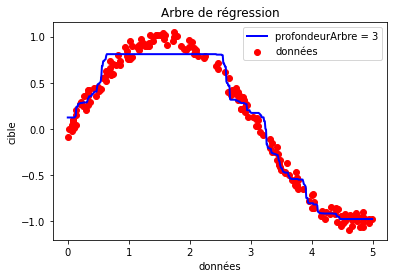

In [63]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#générer les nombre aléatoire
generateur = np.random.RandomState(1)
#tableau trié contenant 80 nombre généré aléatoirement
x = np.sort(5 * generateur.rand(200, 1), axis = 0)
#applatir le tableau en utilisant ravel
y = np.sin(x).ravel()
#ajout d'un bruit
y[::1] += 0.2 * (0.5 - generateur.rand(200))
#instanciation
model_RFReg = RandomForestRegressor(max_depth = 3)
#training
model_RFReg.fit(x, y)
#prédiction
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# transformation d’un tableau 1D en un tableau N*1
prediction = model_RFReg.predict(x_test)
#affichage des résultats
plt.figure()
plt.scatter(x, y, c = "red", label = "données")
plt.plot(x_test, prediction, color = "blue", label = "profondeurArbre = 3",
linewidth = 2)
plt.xlabel("données")
plt.ylabel("cible")
plt.title("Arbre de régression")
plt.legend()
plt.show()